# HW 2: Wrangling

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [2]:
import pandas as pd
import numpy as np

#Q1.1

# retrieve dataset
data_source = "https://raw.githubusercontent.com/jahleeljackson/DS3001-SP26/refs/heads/main/wrangling/assignment/data/airbnb_hw.csv"
airbnb_df = pd.read_csv(data_source)
airbnb_df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [3]:
## EDA

# view price column dtype
print(airbnb_df.Price.dtype) # object

# instances of each example
print(airbnb_df.Price.value_counts())

# null values
print(airbnb_df.Price.isna().sum()) # none


object
Price
150    1481
100    1207
200    1059
125     889
75      873
       ... 
472       1
454       1
328       1
396       1
291       1
Name: count, Length: 511, dtype: int64
0


In [4]:
# change the data type

# must remove commas first
airbnb_df["Price"] = airbnb_df["Price"].str.replace(",", "")
airbnb_df["Price"] = airbnb_df["Price"].astype("int")

# let's see the datatype
airbnb_df.Price.dtype #int 64


dtype('int64')

In [5]:
airbnb_df["Price"]

,Price
0,145
1,37
2,28
3,199
4,549
...,...
30473,300
30474,125
30475,80
30476,35


In [6]:
#Q1.2
# get dataset
data_file = "https://raw.githubusercontent.com/jahleeljackson/DS3001-SP26/refs/heads/main/wrangling/assignment/data/mn_police_use_of_force.csv"
mn_force_df = pd.read_csv(data_file)
mn_force_df.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [7]:
# view column of interest value counts
print("Yes count: ", (mn_force_df.subject_injury == "Yes").sum())
print("No count: ", (mn_force_df.subject_injury == "No").sum())
print("Null count: ", mn_force_df.subject_injury.isna().sum())

nulls_percentage = mn_force_df.subject_injury.isna().sum() / mn_force_df.subject_injury.shape
print("% of null instances: ", (nulls_percentage * 100), "%")

# mn_force_df[["subject_injury", "force_type"]]
mn_force_df.force_type.value_counts().iloc[0] # == "Bodily force"

# As we can see, most of the force type used is bodily force. This proportion is similar to the NaN values in the subject injury
# The kind of subject injury missing is typically as a result of bodily force.


Yes count:  1631
No count:  1446
Null count:  9848
% of null instances:  [76.1934236] %


np.int64(9430)

In [8]:
#Q1.3

pretrial_data = "/justice_data.parquet"

pretrial_df = pd.read_parquet(pretrial_data)
pretrial_df.head()



,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [14]:
data_file = "/GSAF5 (1).xls"
shark_df = pd.read_excel(data_file)
print(shark_df.head())
print(shark_df.columns)
print(shark_df.shape)
print(shark_df.info())

           Date    Year        Type    Country State  \
0  20th January  2026.0  Unprovoked  Australia   NSW   
1  19th January  2026.0  Unprovoked  Australia   NSW   
2  19th January  2026.0  Unprovoked  Australia   NSW   
3  18th January  2026.0  Unprovoked  Australia   NSW   
4  10th January  2026.0  Unprovoked  Australia   NSW   

                                Location           Activity             Name  \
0  Point Plomber North of Port Macquarie            Surfing   Paul Zvirdinas   
1                                Dee Why            Surfing          Unknown   
2                          North Steyne             Surfing  Andre de Ruyter   
3   Nielsen Park Vaucluse Sydney Harbour  Jumping off rocks       Nico Antic   
4                           Avalon Beach            Surfing     Paul Stanton   

  Sex Age  ...                         Species                   Source  pdf  \
0   M  39  ...                       Bull shark          Bob Myatt GSAF  NaN   
1   M  11  ...        

Year range in raw data: 0.0 to 2026.0
Trend in attacks since 1940: increasing


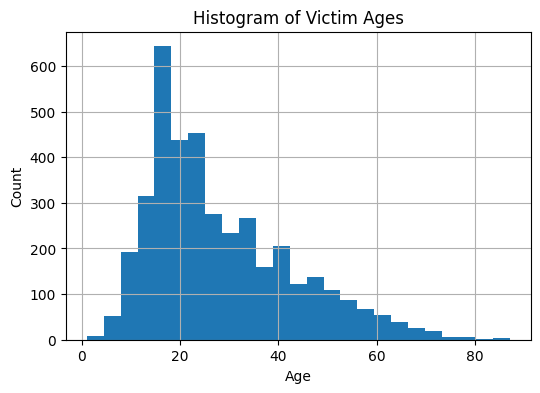

Proportion male victims: 0.8028288543140029
Proportion unprovoked: 0.7386138613861386
Unprovoked attacks on men: 0.8360781309842972
Unprovoked attacks on women: 0.13155878973573343
Fatality rate (unprovoked): 0.24262734584450402
Fatality rate (provoked): 0.03260869565217391
Fatality rate (male): 0.22093023255813954
Fatality rate (female): 0.15432098765432098

How do I feel about sharks:
Sharks behave according to instinct, not malice. Human-shark interactions reflect environmental overlap, not intent.
Proportion of attacks by white sharks: 0.10707213578500707


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------
# 1. Load and drop empty columns
# ---------------------------------------------------------------------
df = pd.read_excel("/GSAF5 (1).xls")

# Drop columns that contain no data
df = df.dropna(axis=1, how='all')

# ---------------------------------------------------------------------
# 2. Clean YEAR variable
# ---------------------------------------------------------------------
# Convert Year to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Describe year values
year_min, year_max = df['Year'].min(), df['Year'].max()

print("Year range in raw data:", year_min, "to", year_max)

# Filter to attacks since 1940
df_since_1940 = df[df['Year'] >= 1940]

# Count attacks per year
attacks_per_year = df_since_1940.groupby('Year').size()

# Determine trend (very rough: compare early vs late averages)
early = attacks_per_year.loc[1940:1970].mean()
late  = attacks_per_year.loc[2000:].mean()
trend = "increasing" if late > early else "decreasing" if late < early else "constant"

print("Trend in attacks since 1940:", trend)

# ---------------------------------------------------------------------
# 3. Clean AGE variable + histogram
# ---------------------------------------------------------------------
def clean_age(x):
    if pd.isna(x):
        return np.nan
    x = str(x).strip()
    if x.isdigit():
        return float(x)
    return np.nan

df['Age_clean'] = df['Age'].apply(clean_age)

plt.figure(figsize=(6,4))
df['Age_clean'].dropna().astype(float).hist(bins=25)
plt.title("Histogram of Victim Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# ---------------------------------------------------------------------
# 4. Proportion of victims who are male
# ---------------------------------------------------------------------
df['Sex_clean'] = df['Sex'].str.upper().str.strip()
df['Sex_clean'] = df['Sex_clean'].replace({'M': 'M', 'F': 'F'})
df['Sex_clean'] = df['Sex_clean'].where(df['Sex_clean'].isin(['M','F']), 'Unknown')

prop_male = (df['Sex_clean'] == 'M').mean()
print("Proportion male victims:", prop_male)

# ---------------------------------------------------------------------
# 5. Clean TYPE: Provoked / Unprovoked / Unknown
# ---------------------------------------------------------------------
df['Type_clean'] = df['Type'].str.title().str.strip()
df['Type_clean'] = df['Type_clean'].replace({
    'Unprovoked': 'Unprovoked',
    'Provoked': 'Provoked'
})
df['Type_clean'] = df['Type_clean'].where(df['Type_clean'].isin(['Provoked','Unprovoked']), 'Unknown')

prop_unprovoked = (df['Type_clean'] == 'Unprovoked').mean()
print("Proportion unprovoked:", prop_unprovoked)

# ---------------------------------------------------------------------
# 6. Clean Fatal Y/N
# ---------------------------------------------------------------------
df['Fatal_clean'] = df['Fatal Y/N'].str.upper().str.strip()
df['Fatal_clean'] = df['Fatal_clean'].replace({'Y':'Y','N':'N'})
df['Fatal_clean'] = df['Fatal_clean'].where(df['Fatal_clean'].isin(['Y','N']), 'Unknown')

# ---------------------------------------------------------------------
# 7. Analysis questions
# ---------------------------------------------------------------------

# Unprovoked attacks by sex
unprov = df[df['Type_clean']=='Unprovoked']
prov   = df[df['Type_clean']=='Provoked']

unprov_male_rate = (unprov['Sex_clean']=='M').mean()
unprov_female_rate = (unprov['Sex_clean']=='F').mean()

print("Unprovoked attacks on men:", unprov_male_rate)
print("Unprovoked attacks on women:", unprov_female_rate)

# Fatality rate by provoked vs unprovoked
fatal_rate_unprov = (unprov['Fatal_clean']=='Y').mean()
fatal_rate_prov   = (prov['Fatal_clean']=='Y').mean()

print("Fatality rate (unprovoked):", fatal_rate_unprov)
print("Fatality rate (provoked):", fatal_rate_prov)

# Fatality rate by sex
male = df[df['Sex_clean']=='M']
female = df[df['Sex_clean']=='F']

fatal_rate_male   = (male['Fatal_clean']=='Y').mean()
fatal_rate_female = (female['Fatal_clean']=='Y').mean()

print("Fatality rate (male):", fatal_rate_male)
print("Fatality rate (female):", fatal_rate_female)

# Opinion on sharks
print("\nHow do I feel about sharks:")
print("Sharks behave according to instinct, not malice. Human-shark interactions reflect environmental overlap, not intent.")

# ---------------------------------------------------------------------
# 8. Proportion of attacks by white sharks
# ---------------------------------------------------------------------
df['Species_clean'] = df['Species '].astype(str).str.lower()

# Look for the word "white" in species description
prop_white = df['Species_clean'].str.contains("white", na=False).mean()

print("Proportion of attacks by white sharks:", prop_white)


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?


1.What is this paper about?

The abstract explains that the paper introduces a standard way to structure datasets, called tidy data, which maps the meaning of data to a specific structural form. It argues that most data analysis tools are designed under the assumption that data are tidy, but most real datasets are messy.

2. Introduction — What is the “tidy data standard” intended to accomplish?

From the introduction, Wickham emphasizes that data analysts use a wide variety of formats, and this variety creates unnecessary friction in analysis. In other words, tidy data is intended to remove ambiguity and ensure that the layout of a dataset clearly represents its meaning.

3. Intro to Section 2 — Explaining the two sentences

a) “Like families, tidy datasets are all alike but every messy dataset is messy in its own way.”

This is a reference to Tolstoy. Wickham uses it to emphasize:

All tidy datasets follow the same rules (variables = columns, observations = rows, observational units = tables).
Messy datasets violate the rules in many different and unique ways, so there is no single pattern to how they are messy.

Each messy dataset might:

* Put variable names in rows,
* Encode multiple variables in a single column,
* Store different observation types together, etc.

Thus, tidy datasets are uniform; messy datasets are idiosyncratic.

b) “For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general.”


4. Section 2.2 — How does Wickham define values, variables, and observations?

Wickham specifies:

* **Values**
  Individual, atomic pieces of data (e.g., “23”, “Male”, “2010”).

* **Variables**
  A variable contains **all values that measure the same underlying attribute** across observations.
  Example: A “temperature” variable contains all temperature values.

* **Observations**
  A set of **values measured on the same unit** (person, day, country, etc.).
  Each row in a tidy dataset corresponds to one observation.

---

5. Section 2.3 — How is “Tidy Data” defined?



Tidy data requires:

1. Each variable forms one column.
2. Each observation forms one row.
3. Each type of observational unit forms one table.

Any dataset not following these three rules is “messy.”

6. Section 3 & 3.1 — Five most common problems with messy datasets



The five most common problems:

1. Column headers are values, not variable names.
2. Multiple variables stored in one column.
3. Variables stored in both rows and columns.
4. Multiple types of observational units stored in one table.
5. A single observational unit stored across multiple tables.

Why are the data in Table 4 messy?

Because column headers are values, not variables.

What is “melting” a dataset?

Melting means:

* Turning columns into rows
* Converting wide datasets into long format
* Producing a *molten* dataset and separating column names into proper variable columns

Wickham defines melting as creating a dataset with:

* A “column” variable containing what used to be column headers
* A “value” variable containing cell values


---

7. Why is Table 11 messy, but Table 12 tidy and “molten”?

Table 11 (weather data) is messy because:

* Days (d1–d31) are stored as separate columns.
* Variables (tmin, tmax) are stored in *rows* under the “element” column.
* Structural missing values appear where months have fewer than 31 days.
* The dataset violates tidy rules: variables are spread across both rows and columns.


Table 12 (the molten version):

* The day values have been melted from multiple columns into a single “date” variable.
* The temperature variable (tmin/tmax) is retained as a variable rather than as row labels.
* Each row now represents one observation for one day, following tidy principles.

Thus:

* Table 11: messy because structure encodes meaning
* Table 12: tidy because variables are columns and each row is one observation

---

8. Section 6 — What is the “chicken-and-egg” problem with focusing on tidy data?

Wickham states that:

* Many data analysis tools implicitly assume tidy data.
* But people rarely create tidy data because the tools they use do not enforce or reward tidiness.

Thus:

* Tools assume tidy data → but datasets are not tidy
* Datasets are not tidy → because tools do not require them to be tidy

This is the chicken-and-egg problem.

What does Wickham hope happens in the future?

He hopes that:

* Future work will develop better data manipulation tools that natively work with tidy datasets.
* More analysts will adopt tidy principles.
* A consistent grammar for data tidying will emerge (similar to ggplot2 for graphics).
* Over time, the ecosystem will reinforce tidiness, reducing messy data problems.
